ANÁLISE DA CORRELAÇÃO DE INDICADORES DA CIDADE DE BOSTON-EUA NO PERÍODO 2013-2019

Dataset:https://data.boston.gov/dataset/economic-indicators-legacy-portal

O código necessita que o arquivo fonte seja acompanhado.

Os dados selecionados para modelagem: "Year"(Anos do período), "Month"(Meses do período), "logan_passengers"(Número de passageiros no aeroporto de Logan), "logan_intl_flights"(Número de voos no aeroporto de Logan), "total_jobs"(Número de empregos no período) e "unemp_rate"(Taxa de desemprego no período). Demais dados foram desconsiderados.

In [1]:
#importando dados e criando dataframe e objeto series para manipulação a partir da biblioteca pandas;

import numpy as np
import pandas as pd

with open("economic-indicators.csv","r") as dataset:
    basedados=dataset.readlines()
s_bd = pd.Series(basedados)
df_bd = pd.DataFrame(basedados)

In [2]:
#agrupando dados
s_bd = df_bd[0].str.split(",")

In [3]:
#selecionando dados
Year = s_bd.str.get(0)
Month = s_bd.str.get(1)
logan_passengers = s_bd.str.get(2)
logan_intl_flights = s_bd.str.get(3)
hotel_occup_rate = s_bd.str.get(4)
hotel_avg_daily_rate = s_bd.str.get(5)
total_jobs = s_bd.str.get(6)
unemp_rate = s_bd.str.get(7)

In [4]:
#montando dataframe
df_bd["Year"]=Year
df_bd["Month"]=Month
df_bd["logan_passengers"]=logan_passengers
df_bd["logan_intl_flights"]=logan_intl_flights
df_bd["hotel_occup_rate"]=hotel_occup_rate
df_bd["hotel_avg_daily_rate"]=hotel_avg_daily_rate
df_bd["total_jobs"]=total_jobs
df_bd["unemp_rate"]=unemp_rate

In [6]:
#limpeza do dataframe
df_bd.drop(0,axis=1,inplace=True)
df_bd.drop(0,inplace=True)

,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate
0,Year,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate
1,2013,1,2019662,2986,0.572,158.93,322957,0.066
2,2013,2,1878731,2587,0.645,165.5,324295,0.06
3,2013,3,2469155,3250,0.819,187.45,325597,0.058
4,2013,4,2551246,3408,0.855,233.44,326101,0.058
...,...,...,...,...,...,...,...,...
80,2019,8,4120937,5190,0.888,270.54,392536,0.027
81,2019,9,3547546,4586,0.895,312.37,385445,0.028
82,2019,10,3771212,4388,0.907,313.17,390983,0.023
83,2019,11,3264105,3959,0.803,238.82,391531,0.021


In [8]:
#conversão
df_bd["Year"]=df_bd["Year"].astype(int)
df_bd["Month"]=df_bd["Month"].astype(int)
df_bd["logan_passengers"]=df_bd["logan_passengers"].astype(int)
df_bd["logan_intl_flights"]=df_bd["logan_intl_flights"].astype(int)
df_bd["hotel_occup_rate"]=df_bd["hotel_occup_rate"].astype(float)
df_bd["hotel_avg_daily_rate"]=df_bd["hotel_avg_daily_rate"].astype(float)
df_bd["total_jobs"]=df_bd["total_jobs"].astype(int)
df_bd["unemp_rate"]=df_bd["unemp_rate"].astype(float)

In [9]:
#agrupando dados
group_df_bd=df_bd.groupby('Year').sum()

In [10]:
#visualizando dados agrupados
group_df_bd

,Month,logan_passengers,logan_intl_flights,hotel_occup_rate,hotel_avg_daily_rate,total_jobs,unemp_rate
Year,,,,,,,
2013,78,30237699,37958,9.634,2595.27,3931280,0.735
2014,78,31463724,40013,9.791,2818.66,4043944,0.631
2015,78,33449580,42654,9.802,2950.87,4157545,0.529
2016,78,36288042,50039,9.743,2962.91,4234620,0.406
2017,78,38410959,52184,9.857,3027.57,4340525,0.416
2018,78,40941925,53679,9.934,3087.90,4524690,0.370
2019,78,42522411,54476,9.929,3088.43,4670489,0.309


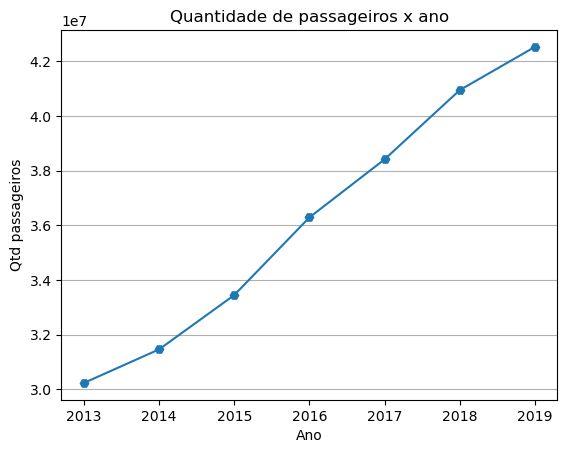

In [11]:
#gráfico1 - Quantidade de passageiros ao longo do período
import matplotlib.pyplot as plt

plt.plot(group_df_bd.loc[[2013,2014,2015,2016,2017,2018,2019],["logan_passengers"]], marker='H')
plt.title("Quantidade de passageiros x ano")
plt.ylabel("Qtd passageiros")
plt.xlabel("Ano")
plt.grid(axis='y');

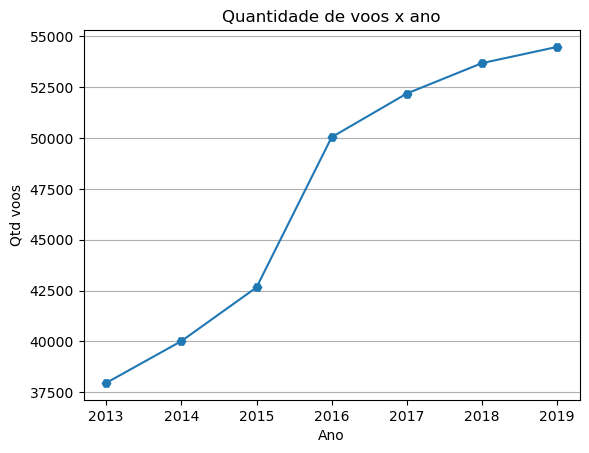

In [12]:
#gráfico2 - Quantidade de voos ao longo do período
plt.plot(group_df_bd.loc[[2013,2014,2015,2016,2017,2018,2019],["logan_intl_flights"]], marker='H')
plt.title("Quantidade de voos x ano")
plt.ylabel("Qtd voos")
plt.xlabel("Ano")
plt.grid(axis='y');

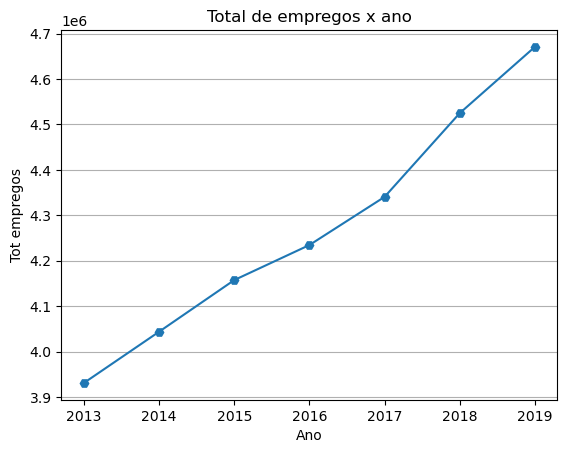

In [13]:
#gráfico3 - Total de empregos ao longo do período
plt.plot(group_df_bd.loc[[2013,2014,2015,2016,2017,2018,2019],["total_jobs"]], marker='H')
plt.title("Total de empregos x ano")
plt.ylabel("Tot empregos")
plt.xlabel("Ano")
plt.grid(axis='y');

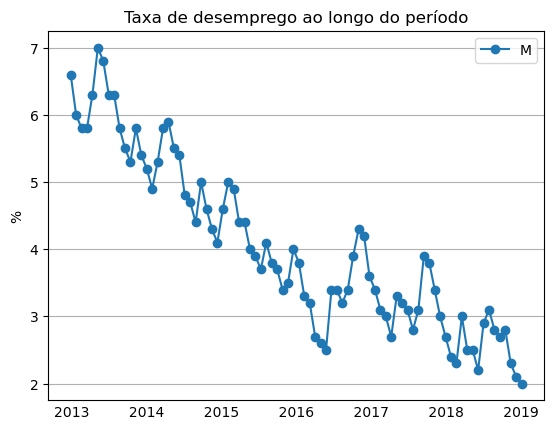

In [14]:
#gráfico4 - Taxa de desemprego ao longo do período
plt.plot(df_bd["unemp_rate"]*100, marker='o')
plt.title("Taxa de desemprego ao longo do período")
plt.ylabel("%")
plt.xlabel("2013         2014         2015         2016         2017         2018         2019")
plt.grid(axis='y')
plt.xticks([])
plt.legend("Mês a Mês");

In [60]:
#interação do usuário para segmentar dados por ano
with open("economic-indicators.csv", "r") as boston:
    total_voos=0
    total_passageiros=0
    total_empregos=0
    ano_usuario=input("Qual ano deseja pesquisar? ")
    for linha in boston.readlines():
        lista=linha.split(",")
        if ano_usuario==lista[0]:
            total_voos = total_voos+float(lista[3])
        if ano_usuario==lista[0]:
            total_passageiros=total_passageiros+float(lista[2])
        if ano_usuario==lista[0]:
            total_empregos = total_empregos+float(lista[6])
        if ano_usuario==lista[0]:            
            menor_taxa = (float(lista[7]))*100
        
    print("O total de voos foi de: ",total_voos)
    print("O total de passageiros foi de: ",total_passageiros)
    print("O total de empregos formais foi de: ",total_empregos)
    print("A menor taxa de desemprego foi de: ",menor_taxa)    

Qual ano deseja pesquisar? 2019
O total de voos foi de:  54476.0
O total de passageiros foi de:  42522411.0
O total de empregos formais foi de:  4670489.0
A menor taxa de desemprego foi de:  2.0


Fato notável que pode ser percebido visualmente através dos gráficos é um decréscimo na taxa de desemprego ao longo do período e consequente aumento na ocupação na cidade ao passo que a quantidade de voos e circulação de passegeiros aumentaram significativamente no período, evidenciando que circulação(check-in/check-out) de pessoas numa cidade tem correlação com crescimento e desenvolvimento da atividade econômica.